# Copy Task Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
import json
import os
import sys
sys.path.append(os.path.abspath(os.getcwd() + "./../"))

%matplotlib inline

## Load training history

To generate the models and training history used in this notebook, run the following commands:

```
mkdir ./notebooks/copy
./train.py --seed 1 --task copy --checkpoint-interval 500 --checkpoint-path ./notebooks/copy
./train.py --seed 10 --task copy --checkpoint-interval 500 --checkpoint-path ./notebooks/copy
./train.py --seed 100 --task copy --checkpoint-interval 500 --checkpoint-path ./notebooks/copy
./train.py --seed 1000 --task copy --checkpoint-interval 500 --checkpoint-path ./notebooks/copy
```

In [2]:
!ls sort_new

 priority_sort-100-4-5-1-batch-10000.json
 priority_sort-100-4-5-1-batch-10000.model
 priority_sort-100-4-5-1-batch-1000.json
 priority_sort-100-4-5-1-batch-1000.model
 priority_sort-100-4-5-1-batch-10500.json
 priority_sort-100-4-5-1-batch-10500.model
 priority_sort-100-4-5-1-batch-11000.json
 priority_sort-100-4-5-1-batch-11000.model
 priority_sort-100-4-5-1-batch-11500.json
 priority_sort-100-4-5-1-batch-11500.model
 priority_sort-100-4-5-1-batch-12000.json
 priority_sort-100-4-5-1-batch-12000.model
 priority_sort-100-4-5-1-batch-12500.json
 priority_sort-100-4-5-1-batch-12500.model
 priority_sort-100-4-5-1-batch-13000.json
 priority_sort-100-4-5-1-batch-13000.model
 priority_sort-100-4-5-1-batch-13500.json
 priority_sort-100-4-5-1-batch-13500.model
 priority_sort-100-4-5-1-batch-14000.json
 priority_sort-100-4-5-1-batch-14000.model
 priority_sort-100-4-5-1-batch-14500.json
 priority_sort-100-4-5-1-batch-14500.model
 priority_sort-100-4-5-1-batch-15000.json
 priority_sort-100-4-5-1-

In [3]:
batch_num = 50000
controller_size = 50
controller_layers = 4
seq_len = 5

files = glob("./sort_new/*-{}-*-{}-*-{}.json".format(controller_size,seq_len,batch_num))
files

['./sort_new/priority_sort-50-4-5-1-batch-50000.json']

In [4]:
# Read the metrics from the .json files
history = [json.loads(open(fname, "rt").read()) for fname in files]
training = np.array([(x['cost'], x['loss'], x['seq_lengths']) for x in history])
print("Training history (seed x metric x sequence) =", training.shape)

Training history (seed x metric x sequence) = (1, 3, 50000)


In [5]:
# Average every dv values across each (seed, metric)
dv = 100
training = training.reshape(len(files), 3, -1, dv).mean(axis=3)
print(training.shape)

(1, 3, 500)


In [6]:
# Average the seeds
training_mean = training.mean(axis=0)
training_std = training.std(axis=0)
print(training_mean.shape)
print(training_std.shape)

(3, 500)
(3, 500)


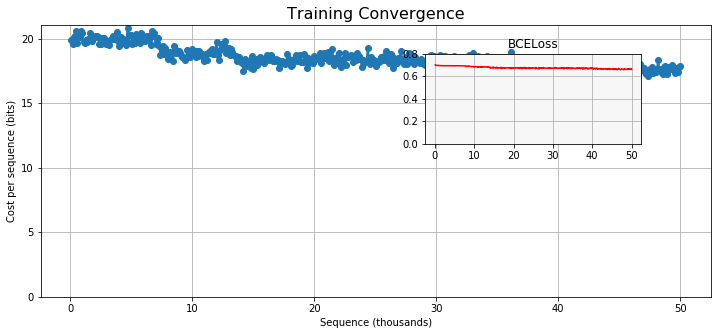

In [7]:
fig = plt.figure(figsize=(12, 5))

# X axis is normalized to thousands
x = np.arange(dv / 1000, (batch_num / 1000) + (dv / 1000), dv / 1000)

# Plot the cost
# plt.plot(x, training_mean[0], 'o-', linewidth=2, label='Cost')
plt.errorbar(x, training_mean[0], yerr=training_std[0], fmt='o-', elinewidth=2, linewidth=2, label='Cost')
plt.grid()
plt.yticks(np.arange(0, training_mean[0][0]+5, 5))
plt.ylabel('Cost per sequence (bits)')
plt.xlabel('Sequence (thousands)')
plt.title('Training Convergence', fontsize=16)

ax = plt.axes([.57, .55, .25, .25], facecolor=(0.97, 0.97, 0.97))
plt.title("BCELoss")
plt.plot(x, training_mean[1], 'r-', label='BCE Loss')
plt.yticks(np.arange(0, training_mean[1][0]+0.2, 0.2))
plt.grid()

plt.show()

In [8]:
history[0]

{'loss': [0.6908831596374512,
  0.699364423751831,
  0.6978386640548706,
  0.7309277653694153,
  0.6978521347045898,
  0.7065843343734741,
  0.728338360786438,
  0.7194687128067017,
  0.7051183581352234,
  0.7144972681999207,
  0.7468605041503906,
  0.6997095346450806,
  0.7464845180511475,
  0.6880854368209839,
  0.7252218127250671,
  0.7200378179550171,
  0.7017520666122437,
  0.733364462852478,
  0.6756953001022339,
  0.6975570917129517,
  0.7112970948219299,
  0.687723696231842,
  0.7121399641036987,
  0.7365904450416565,
  0.7082339525222778,
  0.7183467149734497,
  0.6825284957885742,
  0.6828480362892151,
  0.6712359189987183,
  0.7065449953079224,
  0.7126558423042297,
  0.7052974700927734,
  0.7101150751113892,
  0.6920274496078491,
  0.698458731174469,
  0.704770565032959,
  0.7057163119316101,
  0.6857547760009766,
  0.7106121778488159,
  0.6870161294937134,
  0.6601780652999878,
  0.7184048295021057,
  0.7049710750579834,
  0.6673611402511597,
  0.701087236404419,
  0.69379

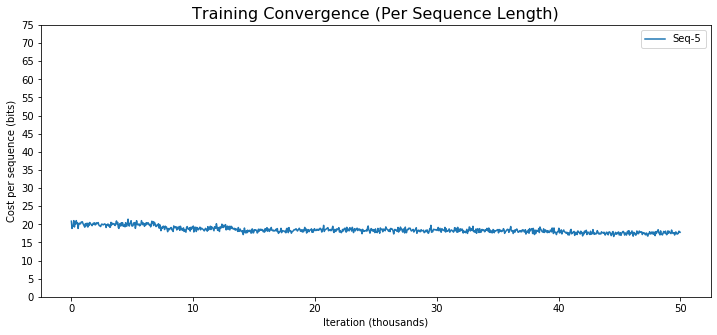

In [9]:
loss = history[0]['loss']
cost = history[0]['cost']
seq_lengths = history[0]['seq_lengths']

unique_sls = set(seq_lengths)
all_metric = list(zip(range(1, batch_num+1), seq_lengths, loss, cost))

fig = plt.figure(figsize=(12, 5))
plt.ylabel('Cost per sequence (bits)')
plt.xlabel('Iteration (thousands)')
plt.title('Training Convergence (Per Sequence Length)', fontsize=16)

for sl in unique_sls:
    sl_metrics = [i for i in all_metric if i[1] == sl]

    x = [i[0] for i in sl_metrics]
    y = [i[3] for i in sl_metrics]
    
    num_pts = len(x) // 50
    total_pts = num_pts * 50
    
    x_mean = [i.mean()/1000 for i in np.split(np.array(x)[:total_pts], num_pts)]
    y_mean = [i.mean() for i in np.split(np.array(y)[:total_pts], num_pts)]
    #40000
    plt.plot(x_mean, y_mean, label='Seq-{}'.format(sl))

plt.yticks(np.arange(0, 80, 5))
plt.legend(loc=0)
plt.show()

# Evaluate

In [10]:
import torch
from IPython.display import Image as IPythonImage
from PIL import Image, ImageDraw, ImageFont
import io
from tasks.copytask import dataloader
from train import evaluate

In [11]:
from tasks.priority_sort import PrioritySortParams, PrioritySortModelTraining
model = PrioritySortModelTraining(params=PrioritySortParams(controller_type='Transformer', controller_size=50))


In [ ]:
batch_num = 50000
controller_size = 50
controller_layers = 4
seq_len = 5

model_name = glob("./sort_new/*-{}-*-{}-*-{}.model".format(controller_size,seq_len,batch_num))[0]
model_name

In [13]:
model

PrioritySortModelTraining(params=PrioritySortParams(name='priority_sort', controller_size=50, controller_layers=4, num_heads=1, sequence_width=8, sequence_len=20, memory_n=128, memory_m=20, num_batches=50000, batch_size=1, rmsprop_lr=0.0001, rmsprop_momentum=0.9, rmsprop_alpha=0.95, controller_type='Transformer', test_data=None), net=EncapsulatedNTM(
  (ntm): NTM(
    (controller): TransformerController(
      (pos_encoder): PositionalEncoding(
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer_encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): Linear(in_features=29, out_features=29, bias=True)
            )
            (linear1): Linear(in_features=29, out_features=2, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=2, out_features=29, bias=True)
            (norm1): LayerNorm((29,), ep

In [14]:
model.net.load_state_dict(torch.load(model_name))
# import io

# with open(model_name,'rb') as f:
#     stream = io.BytesIO(f.tobytes()) 


<All keys matched successfully>

In [15]:
import pickle
#with open(../)

#test_data-contr_size-50-contr_layers-4-seqlen-7.pickle
#test_data_BIG-contr_size-100-contr_layers-4-seqlen-10.pickle
test_data_name = glob("../test_data-*-{}-*-{}-*-{}.pickle".format(controller_size, controller_layers,seq_len))[0]
test_data_name_BIG = glob("../test_data_BIG-*-{}-*-{}-*-{}.pickle".format(controller_size, controller_layers,seq_len*2))[0]

with open(test_data_name,'rb') as f:
    test_data = pickle.load(f)
    
with open(test_data_name_BIG,'rb') as f:
    test_data_big = pickle.load(f)
    

In [16]:
# seq_len = 60
# _, x, y = next(iter(dataloader(1, 1, 8, seq_len, seq_len, None)))


In [17]:
torch.split(torch.stack([torch.cat(x) for x in test_data.keys()]).transpose(0,1),200, dim=1)[0].shape

torch.Size([5, 200, 9])

In [18]:
[torch.cat(x) for x in test_data.keys()][0].shape

torch.Size([5, 9])

In [20]:
def evaluate(net, criterion, X, Y):
    """Evaluate a single batch (without training)."""
    inp_seq_len = X.size(0)
    outp_seq_len, batch_size, _ = Y.size()

    # New sequence
    net.init_sequence(batch_size)

    # Feed the sequence + delimiter
    states = []
    for i in range(inp_seq_len):
        o, state = net(X[i])
        states += [state]

    # Read the output (no input given)
    y_out = torch.zeros(Y.size())
    for i in range(outp_seq_len):
        y_out[i], state = net()
        states += [state]

    loss = criterion(y_out, Y)

    y_out_binarized = y_out.clone().data
    y_out_binarized.apply_(lambda x: 0 if x < 0.5 else 1)

    # The cost is the number of error bits per sequence
    cost = torch.sum(torch.abs(y_out_binarized - Y.data))
    #print(loss.data)
    result = {
        'loss': loss.data,#[0],
        'cost': cost / batch_size,
        'y_out': y_out,
        'y_out_binarized': y_out_binarized,
        'states': states
    }

    return result

In [21]:
#result = evaluate(model.net, model.criterion, test_data.keys(), list(test_data.values()))
result = evaluate(model.net, model.criterion, torch.split(torch.stack([torch.cat(x) for x in test_data.keys()]).transpose(0,1),50, dim=1)[0], torch.split(torch.stack([torch.cat(y) for y in test_data.values()]).transpose(0,1),50, dim=1)[0])

y_out = result['y_out']

/home/leon/anaconda3/envs/ntm/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.6735)

In [34]:
from tqdm import trange
batch_num = 50000
controller_size = 50
controller_layers = 4
seq_len = 5
losses = []
losses_big = []
for b_num in trange(0,50000,500):
    model_name = glob("./sort_new/*-{}-*-{}-*-{}.model".format(controller_size,seq_len,batch_num))[0]
    model.net.load_state_dict(torch.load(model_name))
    losses.append(evaluate(model.net, model.criterion, torch.split(torch.stack([torch.cat(x) for x in test_data.keys()]).transpose(0,1),25, dim=1)[0], torch.split(torch.stack([torch.cat(y) for y in test_data.values()]).transpose(0,1),25, dim=1)[0])['loss'])
    losses_big.append(evaluate(model.net, model.criterion, torch.split(torch.stack([torch.cat(x) for x in test_data_big.keys()]).transpose(0,1),25, dim=1)[0], torch.split(torch.stack([torch.cat(y) for y in test_data_big.values()]).transpose(0,1),25, dim=1)[0])['loss'])

100%|██████████| 100/100 [08:59<00:00,  5.39s/it]


In [ ]:
from tqdm import trange, tqdm
#tqdm.jupyter()
batch_num = 50000
controller_size = 50
controller_layers = 4
seq_len = 5

data = {}
params_num = {}
for controller_size in tqdm([50,100,200]):
    data[controller_size] = {}
    params_num[controller_size] = {}
    for seq_len in tqdm([5,7,10]):
        data[controller_size][seq_len] = {}
        #losses = []
        #losses_big = []
        for b_num in trange(0,50000,500):
            if len(glob("./sort_new/*-{}-*-{}-*-{}.model".format(controller_size,seq_len,batch_num)))>0:
                model_name = glob("./sort_new/*-{}-*-{}-*-{}.model".format(controller_size,seq_len,batch_num))[0]
                model.net.load_state_dict(torch.load(model_name))
                test_loss = evaluate(model.net, model.criterion, torch.split(torch.stack([torch.cat(x) for x in test_data.keys()]).transpose(0,1),25, dim=1)[0], torch.split(torch.stack([torch.cat(y) for y in test_data.values()]).transpose(0,1),25, dim=1)[0])['loss']
                test_loss_big = evaluate(model.net, model.criterion, torch.split(torch.stack([torch.cat(x) for x in test_data_big.keys()]).transpose(0,1),25, dim=1)[0], torch.split(torch.stack([torch.cat(y) for y in test_data_big.values()]).transpose(0,1),25, dim=1)[0])['loss']
                #losses.append(test_loss)
                #losses_big.append(test_loss_big)
                data[controller_size][seq_len]['test_loss'] = test_loss
                data[controller_size][seq_len]['test_loss_big'] = test_loss_big
                
                params_num[controller_size] = model.net.calculate_num_params()
                

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:05<09:09,  5.55s/it]

  2%|▏         | 2/100 [00:10<08:58,  5.49s/it]

  3%|▎         | 3/100 [00:16<08:49,  5.46s/it]

  4%|▍         | 4/100 [00:21<08:49,  5.51s/it]

  5%|▌         | 5/100 [00:27<08:38,  5.46s/it]

  6%|▌         | 6/100 [00:32<08:34,  5.47s/it]

  7%|▋         | 7/100 [00:38<08:26,  5.44s/it]

  8%|▊         | 8/100 [00:43<08:23,  5.47s/it]

  9%|▉         | 9/100 [00:49<08:16,  5.46s/it]

 10%|█         | 10/100 [00:54<08:14,  5.49s/it]

 11%|█         | 11/100 [01:00<08:08,  5.49s/it]

 12%|█▏        | 12/100 [01:05<07:56,  5.41s/it]

 13%|█▎        | 13/100 [01:11<07:56,  5.48s/it]

 14%|█▍        | 14/100 [01:16<07:51,  5.48s/it]

 15%|█▌        | 15/100 [01:22<07:48,  5.51s/it]

 16%|█▌        | 16/100 [01:27<07:39,  5.47s/it]

 17%|█▋        | 17/100 [01:32<07:32,  5.45s/it]

 18%|█▊        | 18/100 [01:38<07:34,  5.54s/it]

 19%|█▉        | 19/100 [01:4

 43%|████▎     | 43/100 [03:57<05:06,  5.38s/it]

 44%|████▍     | 44/100 [04:03<05:04,  5.44s/it]

 45%|████▌     | 45/100 [04:08<05:02,  5.50s/it]

 46%|████▌     | 46/100 [04:14<04:55,  5.47s/it]

 47%|████▋     | 47/100 [04:19<04:48,  5.44s/it]

 48%|████▊     | 48/100 [04:24<04:42,  5.43s/it]

 49%|████▉     | 49/100 [04:30<04:42,  5.53s/it]

 50%|█████     | 50/100 [04:36<04:38,  5.56s/it]

 51%|█████     | 51/100 [04:41<04:30,  5.53s/it]

 52%|█████▏    | 52/100 [04:47<04:25,  5.52s/it]

 53%|█████▎    | 53/100 [04:52<04:17,  5.47s/it]

 54%|█████▍    | 54/100 [04:58<04:17,  5.59s/it]

 55%|█████▌    | 55/100 [05:04<04:13,  5.64s/it]

 56%|█████▌    | 56/100 [05:09<04:08,  5.64s/it]

 57%|█████▋    | 57/100 [05:15<04:02,  5.64s/it]

 58%|█████▊    | 58/100 [05:20<03:54,  5.57s/it]

 59%|█████▉    | 59/100 [05:26<03:45,  5.50s/it]

 60%|██████    | 60/100 [05:31<03:40,  5.51s/it]

 61%|██████    | 61/100 [05:37<03:32,  5.45s/it]

 62%|██████▏   | 62/100 [05:42<03:27,  5.47s/it]



In [25]:
result['loss']

tensor(0.6735)

In [50]:
def cmap(value):
    pixval = value * 255
    low = 64
    high = 240
    factor = (255 - low - (255-high)) / 255
    return int(low + pixval * factor)

def draw_sequence(y, u=12):
    seq_len = y.size(0)
    seq_width = y.size(2)
    inset = u // 8
    pad = u // 2
    width = seq_len * u + 2 * pad
    height = seq_width * u + 2 * pad
    im = Image.new('L', (width, height))
    draw = ImageDraw.ImageDraw(im)
    draw.rectangle([0, 0, width, height], fill=250)
    for i in range(seq_len):
        for j in range(seq_width):
            val = 1 - y[i, 0, j]#.data[0]
            draw.rectangle([pad + i*u + inset,
                            pad + j*u + inset,
                            pad + (i+1)*u - inset,
                            pad + (j+1)*u - inset], fill=cmap(val))

    return im

def im_to_png_bytes(im):
    png = io.BytesIO()
    im.save(png, 'PNG')
    return bytes(png.getbuffer())

def im_vconcat(im1, im2, pad=8):
    assert im1.size == im2.size
    w, h = im1.size

    width = w
    height = h * 2 + pad

    im = Image.new('L', (width, height), color=255)
    im.paste(im1, (0, 0))
    im.paste(im2, (0, h+pad))
    return im

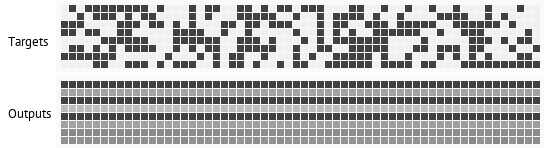

In [51]:
def make_eval_plot(y, y_out, u=12):
    im_y = draw_sequence(y, u)
    im_y_out = draw_sequence(y_out, u)
    im = im_vconcat(im_y, im_y_out, u//2)
    
    w, h = im.size
    pad_w = u * 7
    im2 = Image.new('L', (w+pad_w, h), color=255)
    im2.paste(im, (pad_w, 0))
    
    # Add text
    font = ImageFont.truetype("./fonts/PT_Sans-Web-Regular.ttf", 13)
    draw = ImageDraw.ImageDraw(im2)
    draw.text((u,4*u), "Targets", font=font)
    draw.text((u,13*u), "Outputs", font=font)
    
    return im2

im = make_eval_plot(y, y_out, u=8)
IPythonImage(im_to_png_bytes(im))

## Create an animated GIF

Lets see how the prediction looks like in each checkpoint that we saved. 

In [30]:
seq_len = 80
_, x, y = next(iter(dataloader(1, 1, 8, seq_len, seq_len)))

frames = []
font = ImageFont.truetype("./fonts/PT_Sans-Web-Regular.ttf", 13)
for batch_num in range(500, 10500, 500):
    model = CopyTaskModelTraining()
    model.net.load_state_dict(torch.load("./copy_l/copy-task-1-batch-{}.model".format(batch_num)))
    result = evaluate(model.net, model.criterion, x, y)
    y_out = result['y_out']
    frame = make_eval_plot(y, y_out, u=10)
    
    w, h = frame.size
    frame_seq = Image.new('L', (w, h+40), color=255)
    frame_seq.paste(frame, (0, 40))
    
    draw = ImageDraw.ImageDraw(frame_seq)
    draw.text((10, 10), "Sequence Num: {} (Cost: {})".format(batch_num, result['cost']), font=font)
    
    frames += [frame_seq]

In [76]:
im = frames[0]
im.save("./copy_l-train-80.gif", save_all=True, append_images=frames[1:], loop=0, duration=1000)

im = frames[0]
im.save("./copy-l-train-80-fast.gif", save_all=True, append_images=frames[1:], loop=0, duration=100)